In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
SIZE = 128

In [3]:
img = cv2.imread('Dataset/train/ModerateDemented/moderateDem0.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (SIZE, SIZE))

In [4]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

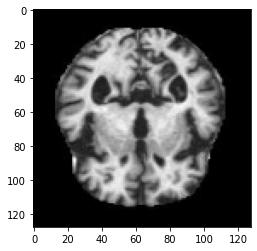

In [5]:
plt.imshow(img, cmap='gray')

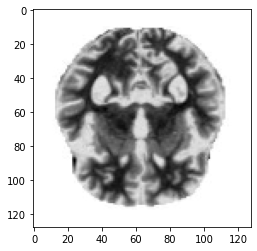

In [6]:
def image_negatif(pixels):
    result = []
    for row in pixels:
        current = []
        for pixel in row:
            negatif = 255 - pixel
            current.append(negatif)
        result.append(current)
    return np.array(result)

img_negatif = image_negatif(img)
plt.imshow(img_negatif, cmap='gray')

In [7]:
# Mengurangi noise dengan median filtering
def median_filter(data, kernel_size):
    temp = []
    indexer = kernel_size // 2
    data_final = []
    data_final = np.zeros((len(data), len(data[0])))
    for i in range(len(data)):
        
        for j in range(len(data[0])):
            
            for z in range(kernel_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(kernel_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data) - 1:
                        temp.append(0)
                    else:
                        for k in range(kernel_size):
                            temp.append(data[i + z - indexer][j + k - indexer])
                            
            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [8]:
filtered_img = median_filter(img_negatif, 12)

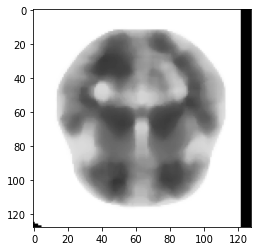

In [9]:
plt.imshow(filtered_img, cmap='gray')

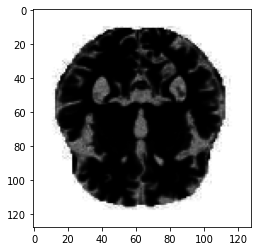

In [10]:
def logarithmic_trans(c, gamma, pixels):
    result = []
    for row in pixels:
        current = []
        for pixel in row:
            rule = math.floor(c * ((pixel) ** gamma))
            current.append(rule)
        result.append(current)
    return np.array(result)

log_img = logarithmic_trans(1.33, 7, img_negatif)
plt.imshow(log_img, cmap='gray')